**GAN Training**

With feedback from the discriminator on whether a fake image looks real or fake, the generator starts producing fake images that are more and more realistic (that tries to fool the discriminator). Images that look “fake” to the discriminator are discarded in favor of those that look “real” to the discriminator; since the discriminator is improving over time as it sees more reals and fakes, the generator needs to continually learn too.

GAN training works in the alternating fashion typically. And in order to improve that training over time, we have to keep the scale of both the generator and discriminator close to each other to maintain a good training process.
If one model significantly better than the other, it doesn’t help the other learn because the feedback isn’t useful. Imagine if  a beginning artist, showed his work to an art expert, asking whether the painting looked like a famous piece and all they said was ‘no’. Because they have a very discerning eye, they know the image is not right, but won’t be able to tell how close the painting is.

One common issue is having a superior discriminator, having the discriminator learn too quickly. And when it learns too quickly and it suddenly looks at a fake image and says, this is 100% fake. But this 100% is not useful for the generator at all because it doesn't know which way to grow and learn. And so having output from the discriminator be much more informative, like 0.87 fake or 0.2 fake as opposed to just 100% fake. Probability of fake, is much more informative to the generator in terms of updating its weights and having it learn to generate realistic images over time.

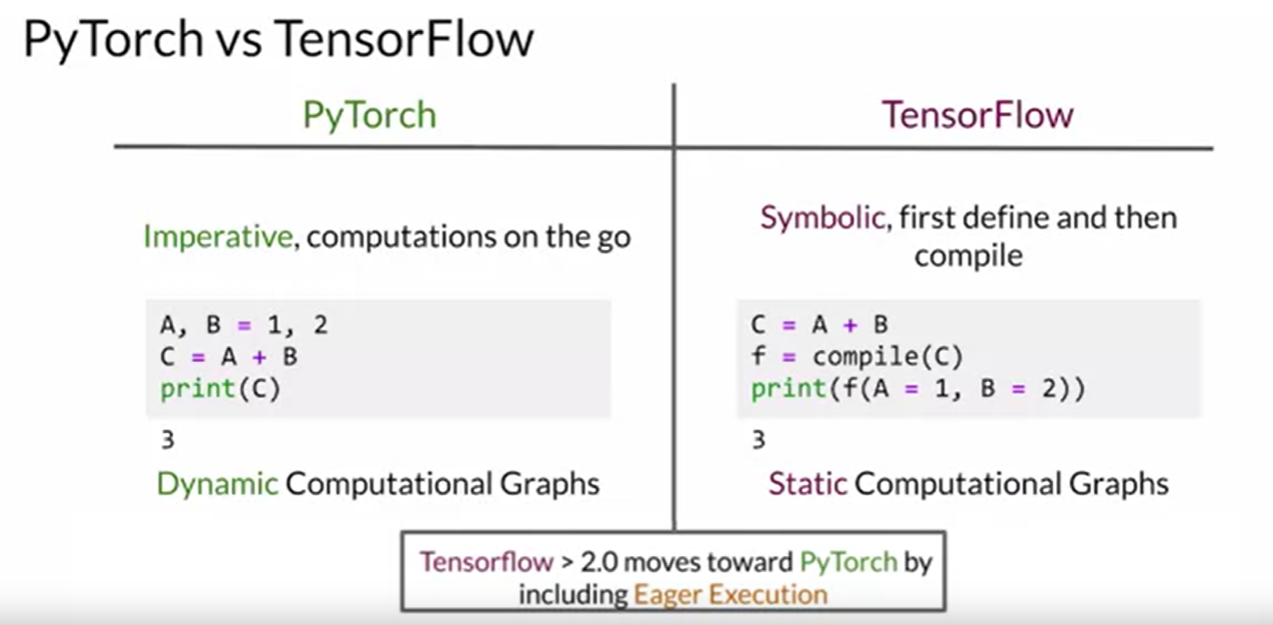

The main difference between PyTorch and TensorFlow is the way they typically make computations. In PyTorch, we compute things on the go, and this is sometimes called imperative programming. In TensorFlow, we first define how to compute things, and then make the calculations afterwards, which is called a symbolic approach. So this just means that in PyTorch, we have some values for variables A and B, like A is 1, B is 2 and when we sum them up, get 3 as a result. Well, in TensorFlow, we don't have initial values for A and B, but we can store the sum of them in another variable, C. 

**Activation Functions**
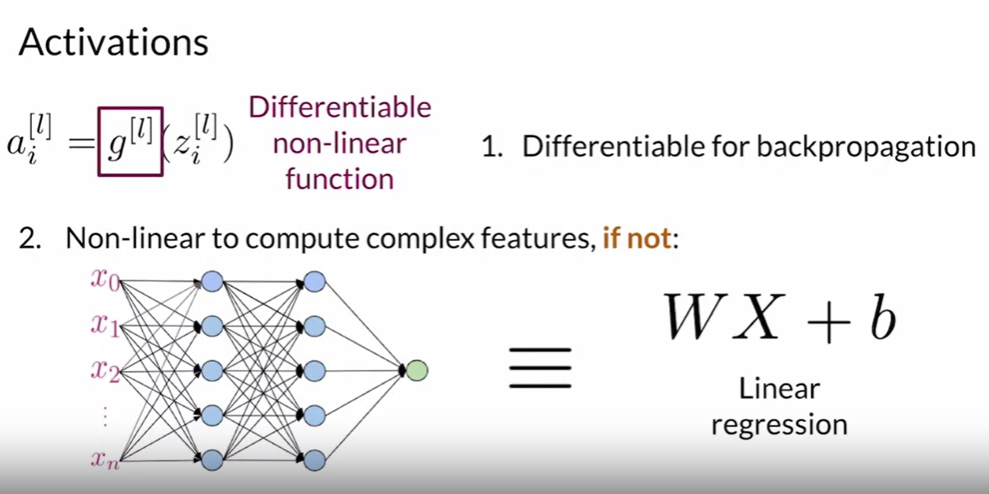

Activations are functions that take any real number as input, also known as its domain, and outputs a number in a certain range using a non-linear differentiable function. The non-linearity specifically ensures that linear layers don't reduce to a single linear layer, and network can learn more complex functions. 

**Common activation functions**
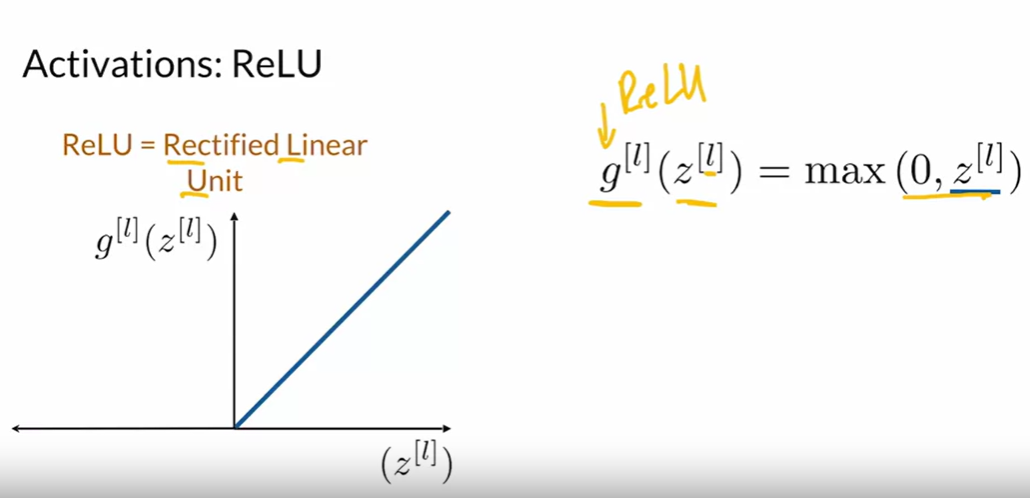

ReLU is strictly speaking not differentiable at z equals zero. But by convention and implementation, the derivative of ReLU at z equals zero is often set to zero here. 
The flat part of the ReLU activation function when z is negative always has a derivative equal to zero. This can be problematic because the learning process depends on the derivative to provide important information on how to update the weights. With a zero derivative some nodes get stuck on the same value and their weights stops learning. That part of the network would stop learning. In fact, the previous components of the network will all be affected as well. This problem is known as the dying ReLU problem because it's the end of learning, and that's why a variation of ReLU exists. It's called the Leaky ReLU.

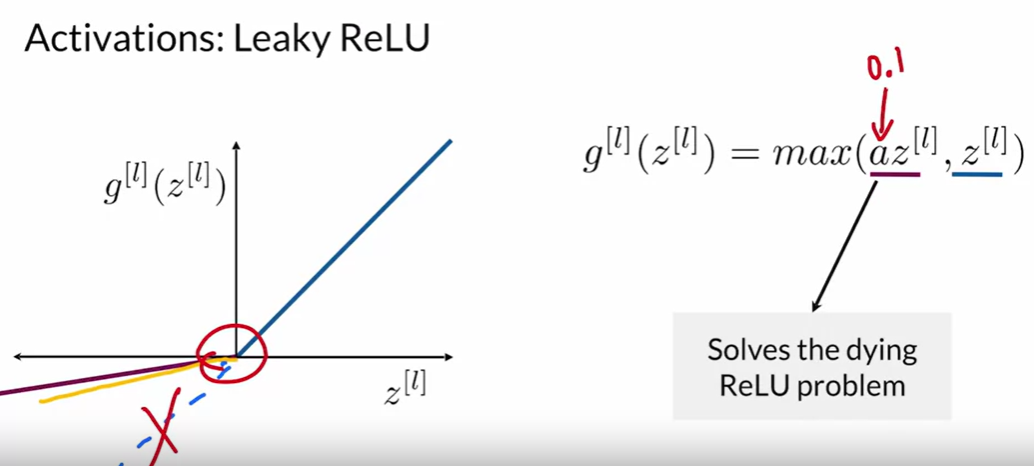

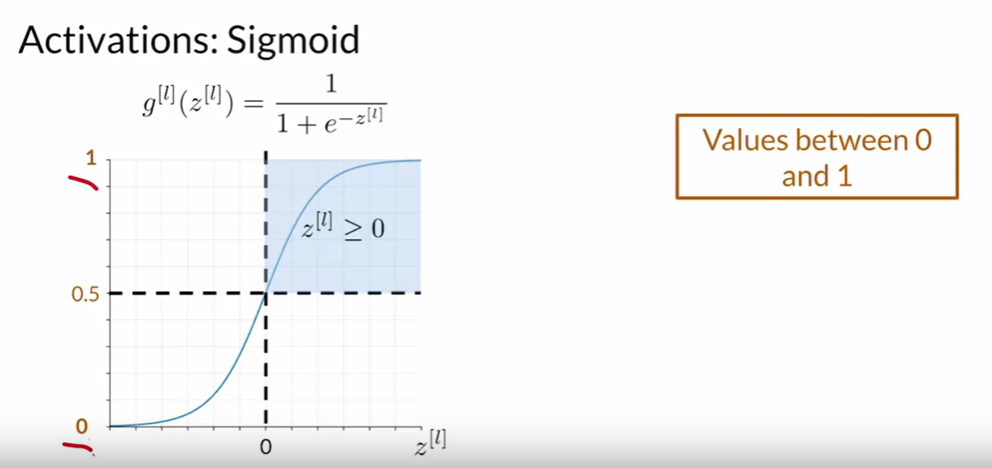

Sigmoid activation function outputs a value between 0 and 1, so it is often used in binary classification models in the last layer to indicate a probability between 0 and 1. It isn't used very often in hidden layers because the derivative of the function approaches zero at the tails of this function. This produces what we call vanishing gradient problems, or saturated outputs here at the tails of the function.

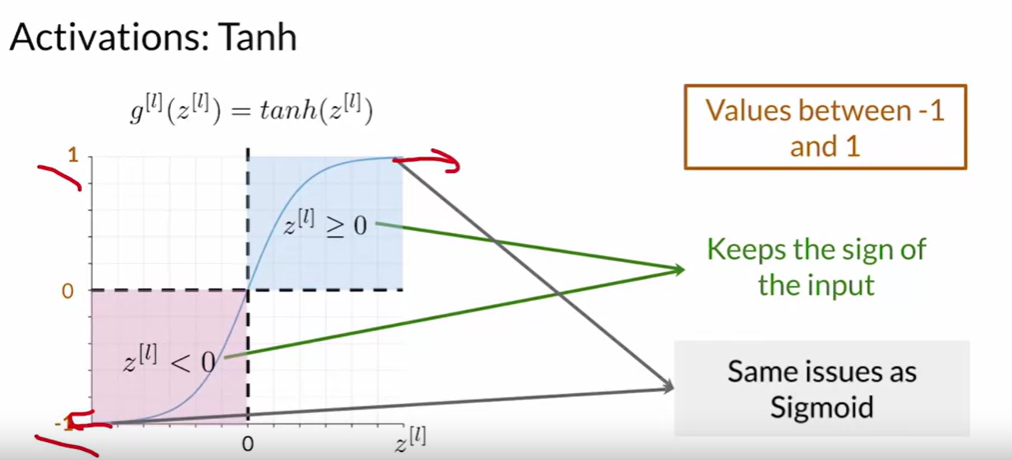

**Batch Normalization**

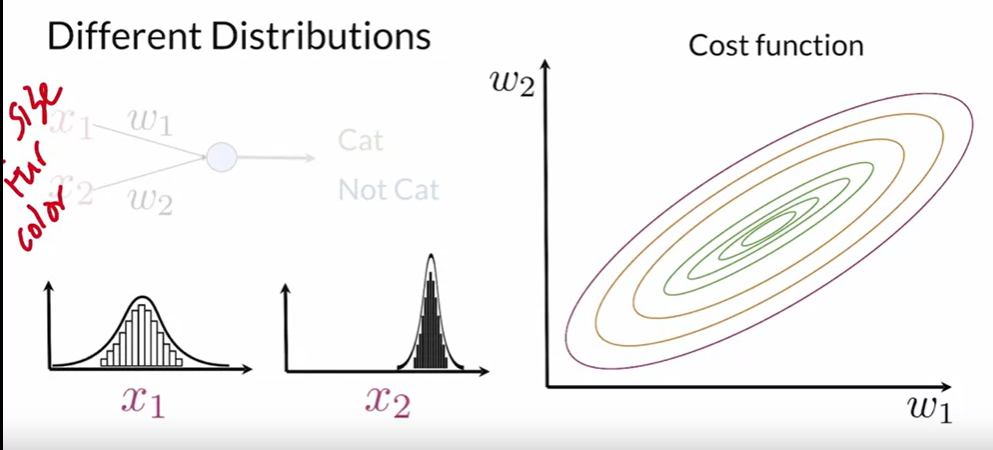

In a single activation that outputs whether any example based on x1, x2 features is a cat or not a cat. And let's say the distribution of x1, the size of cat, over data set is normally distributed. For example, with very few extremely small or extremely large examples. While the distribution of fur color, x2 skews a little bit towards higher values over here with a much higher mean and lower standard deviation. The result of having these different distributions impacts how neural network learns. For example, if it's trying to get to the local minimum and has very different distributions across inputs, then the cost function will be elongated. So that changes to the weights relating to each of the inputs will have kind of a different effect of varying impact on this cost function. And this makes training fairly difficult, makes it slower and highly dependent on how the weights are initialized. 

**Covariate shift** is a change in the distribution of the model's inputs between training and test data.  Using normalization, the effect of this covariate shift reduces significantly. 

Batch normalization seeks to remedy the situation of internal covariate shift between hidden layers. And normalizes all these internal nodes based on statistics calculated for each input batch. And this is in order to reduce the internal covariate shift. And this has the added benefit of smoothing the cost function out and making the neural network easier to train and speeding up whole training process.

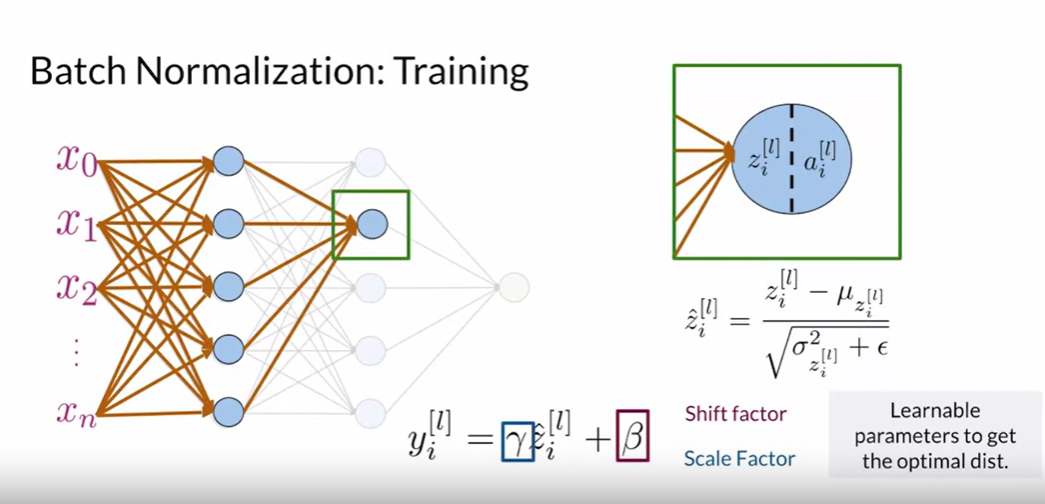

During the training stage of networks, as the parameters of the preceding layers change, the distribution of inputs to the current layer changes accordingly, such that the current layer needs to constantly readjust to new distributions. This problem is especially severe for deep networks, because small changes in shallower hidden layers will be amplified as they propagate within the network, resulting in significant shift in deeper hidden layers. Therefore, the method of batch normalization is proposed to reduce these unwanted shifts to speed up training and to produce more reliable models.

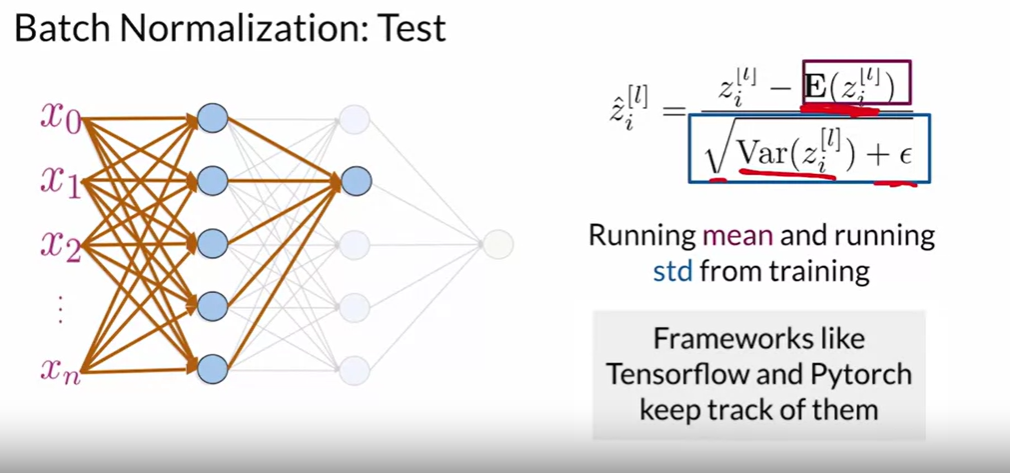

Finally, at test time, the running statistics from training are applied to the entire data set, which keeps predictions stable because the training values are independent and fixed.
Note: We use the batch mean and standard deviation during training and the running statistics (that was computed over the entire training set) for testing. The running values are fixed after training.

**Here are the main features of DCGAN :**

1. Use convolutions without any pooling layers
2. Use batchnorm in both the generator and the discriminator
3. Don't use fully connected hidden layers
4. Use ReLU activation in the generator for all layers except for the output, which uses a Tanh activation.
5. Use LeakyReLU activation in the discriminator for all layers except for the output, which does not use an activation

**Convolution**

Convolution allows to detect key features in different areas of an image. The filters scan across the image, to find various features. For example, an eye filter will tell which parts of the image contains eyes and an ear filter will tell which parts contain ears. Each of these filters is just a matrix of real values and these exact values are learned during training. These values are used to compute a convolution on the input image. So in reality, they're much more abstract than eye or nose filters, but they do pick up on fairly high level features such as eyes and noses. 

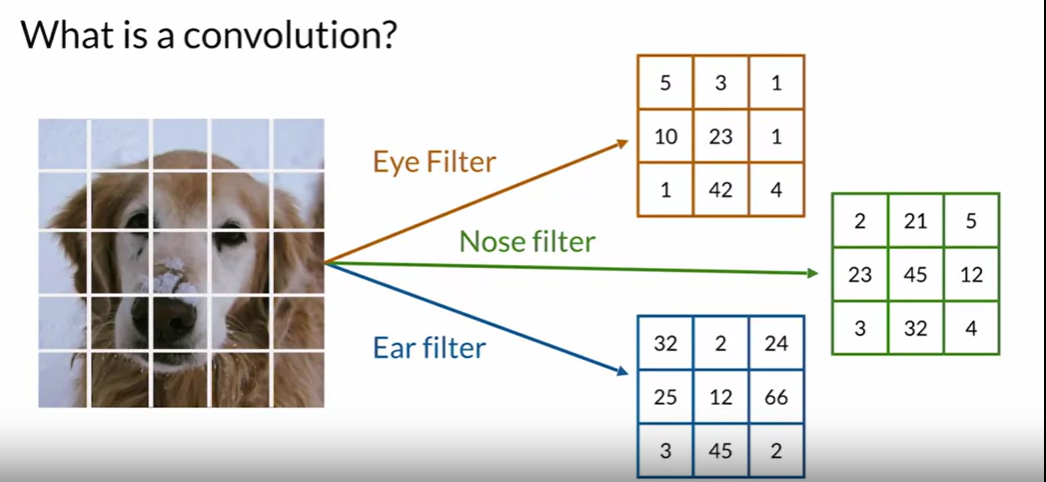

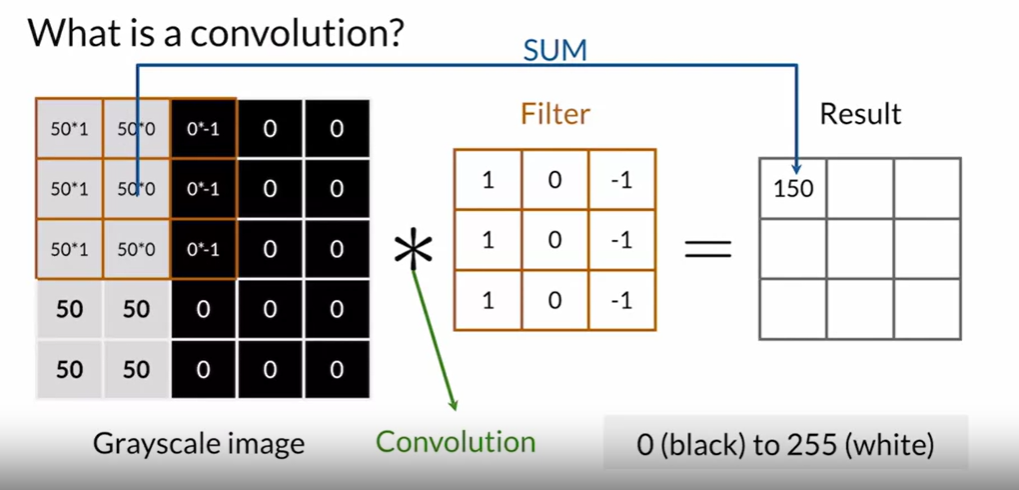

Convolutions reduce the size of an image while preserving key features and patterns.

**Padding and Stride**

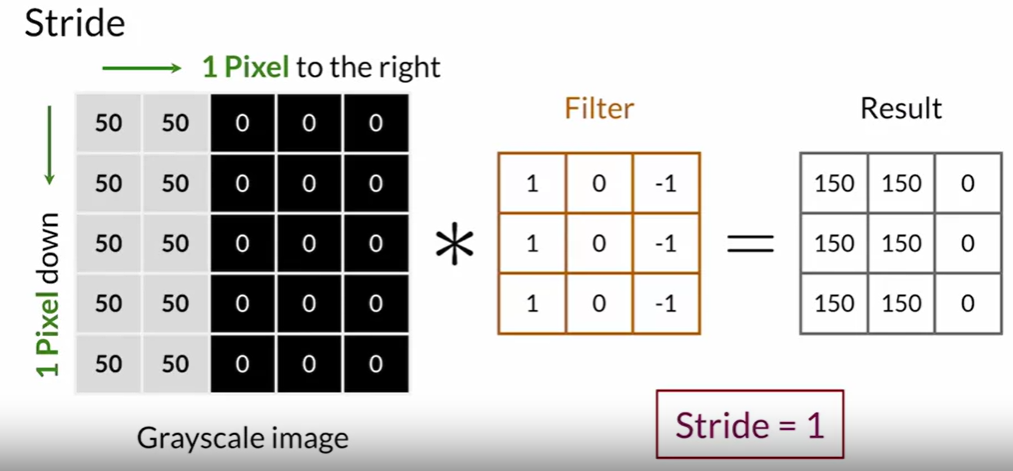

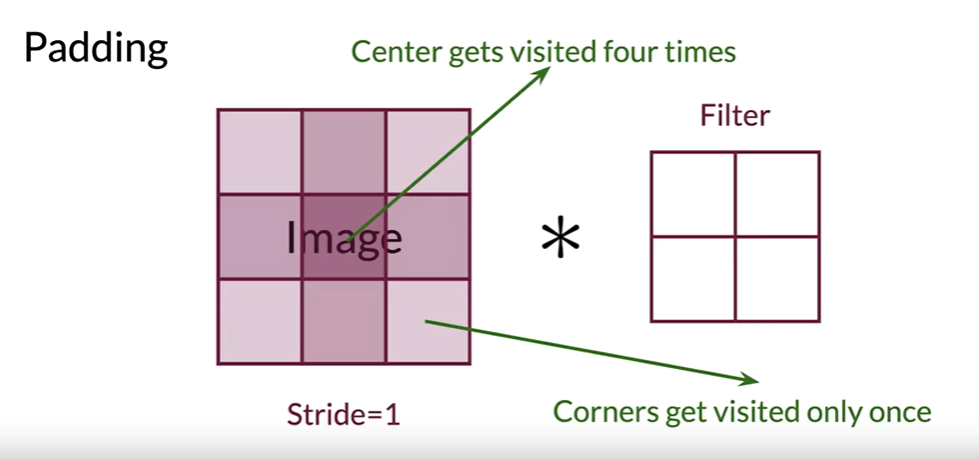

When we compute the convolutions with stride of one in this case, we visit four sections of the image. One in the top-left corner, one in the top-right corner, one in the bottom-left and one in the bottom-right. At the end, the pixel in the centergets visited four times, while the pixels in the corners are only visited once and the other pixels are visited twice. So this means that the information kept in the center, gets more attention than the information on the edges typically. This is a problem if we have, let's say features on the edges that we care about.

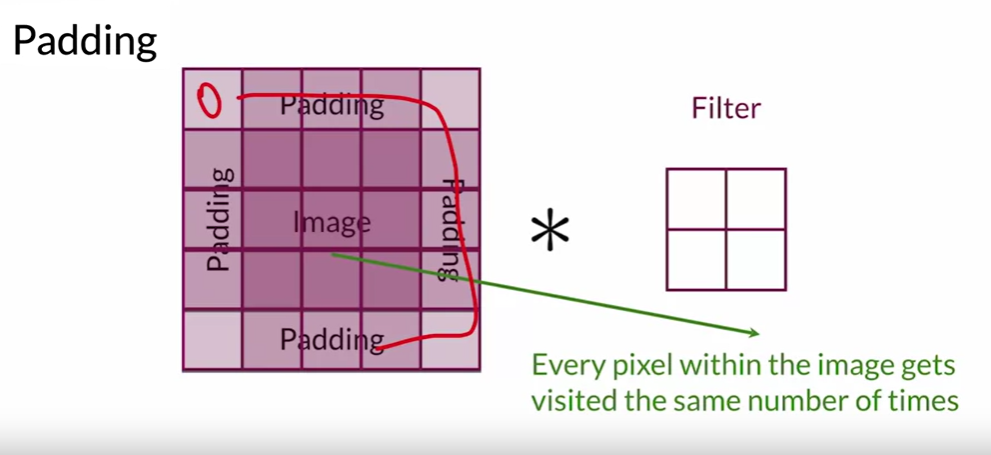

To address this, we can put a frame around the image so all the information appears at the center of this whole new picture, exactly like in a framed picture. This is called padding. The padding size can vary depending on the size of the filter, and the size of the image. The value used for the padding can be anything actually in this outside value, but it's often set to zero, which is called zero-padding. Mow the filter scans the image along with its frame, but this time the result is that, every pixel in the image is visited the same number of times.

**Pooling and Upsampling**

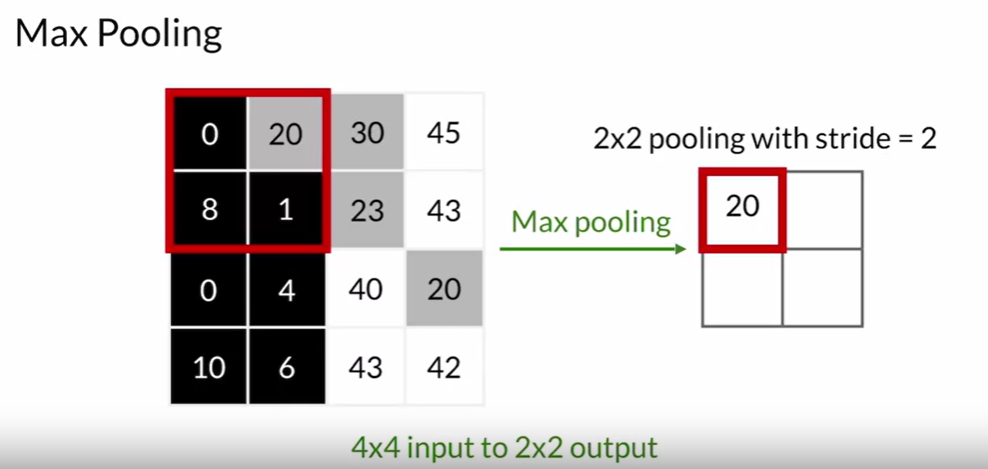

Pooling is used to lower the dimension of the input images by taking the mean or finding the maximum value of different areas. 

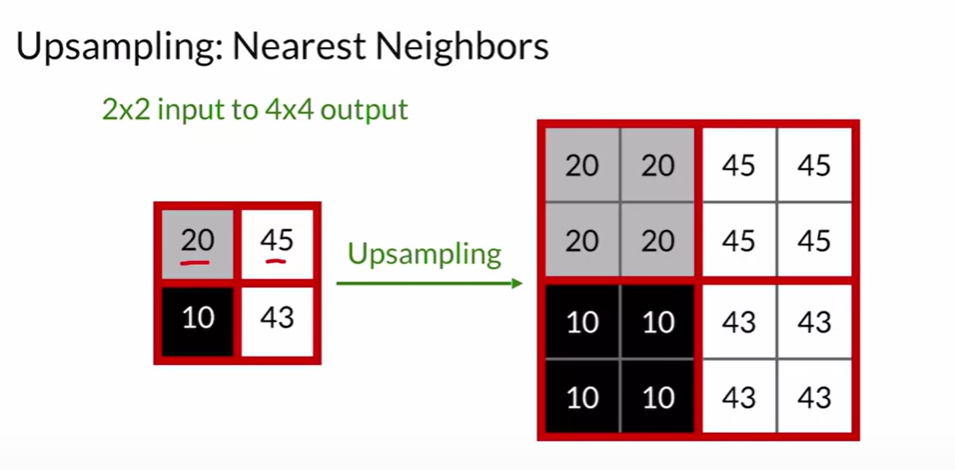

One easy way to up-sample is known as nearest neighbors up-sampling and using this method, we can copy the values of the pixels from our input multiple times to fill the output. 

**Transposed Convolution**

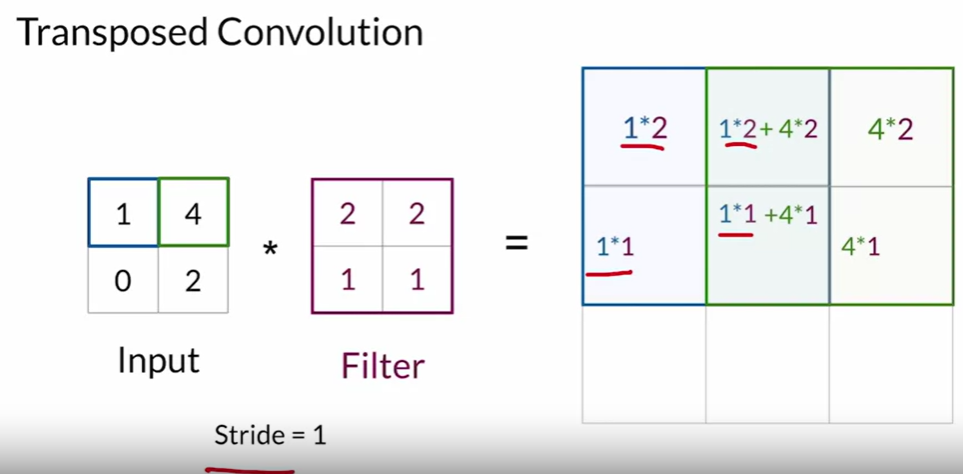

Note: results have a checkeboard pattern

**Deconvolution and checkerboard artifacts**

The most prominent problem associated with the deconvolution layer is the presence of checkerboard artifacts in output images.
When the kernel size (output window size) of the deconvolution is not divisible by the stride (upscaling factor), the number of Low Resolution features that contribute to a single high resolution (HR) feature is not constant across the HR feature maps; this is called the deconvolution overlap. 
